# 라이브러리 로드 및 드라이브 마운트

In [1]:
import sys
import folium
import pandas as pd
import numpy as np
print(sys.version)

3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]


# 버스정류장 위치

In [2]:
data = pd.read_csv("/content/bus_location.csv", encoding='cp949')

In [3]:
data.head()

,정류소번호,정류소명,X좌표,Y좌표
0,1001,종로2가사거리,126.987750,37.569765
1,1002,창경궁.서울대학교병원,126.996566,37.579183
2,1003,명륜3가.성대입구,126.998340,37.582671
3,1004,종로2가.삼일교,126.987613,37.568579
4,1005,혜화동로터리.여운형활동터,127.001744,37.586243


In [4]:
len(data)

12559

In [5]:
print(data['X좌표'].mean())
print(data['Y좌표'].mean())

126.98441307892749
37.55064026464741


In [6]:
import matplotlib.pyplot as plt

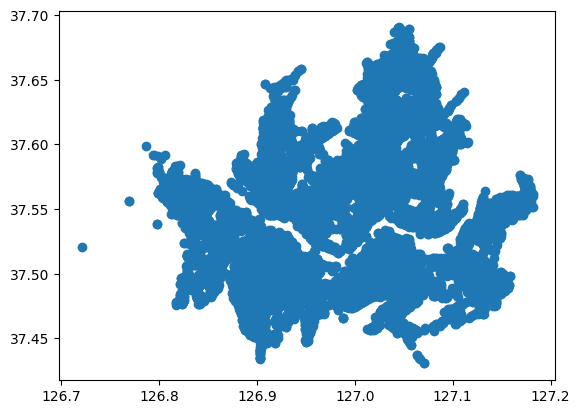

In [7]:
plt.scatter(data['X좌표'], data['Y좌표'])
plt.show()

# Folium 및 json 파일 테스트

In [8]:
# 위도_Y
latitude = 37.569765
# 경도_X
longitude = 126.987750
#  37.547850180, 127.074454848.

In [9]:
m = folium.Map(location=[latitude, longitude],     # 지도의 중심위치 설정
               zoom_start=17,                      # zoom level 설정
               width = 750,
               height = 500,
               tiles='cartodbpositron'
)

In [10]:
folium.Marker([latitude, longitude],
              popup="bus stop",
              tooltip="bus").add_to(m)

In [11]:
import requests
import json

# 서울 행정구역 json raw파일(githubcontent)
r = requests.get('https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json')
c = r.content
seoul_geo = json.loads(c)

In [12]:
r

<Response [200]>

In [13]:
folium.Marker([latitude, longitude],
              popup="bus stop",
              tooltip="bus").add_to(m)


In [14]:
m = folium.Map(
    location=[37.559819, 126.963895],
    zoom_start=11,
    tiles='cartodbpositron'
)

folium.GeoJson(
    seoul_geo,
    name='지역구'
).add_to(m)

In [15]:
for i in range(10982, 11579):
  latitude = data.iloc[i, 3]  # 위도_Y
  longitude = data.iloc[i, 2] # 경도_X

  folium.Marker([latitude, longitude],
                popup="bus stop",
                tooltip="bus").add_to(m)


In [16]:
print("강남 시작 =", data.iloc[10982, 0])
print("강남 끝 =", data.iloc[11578, 0])

강남 시작 = 23103
강남 끝 = 23982


In [17]:
c = r.content
seoul_geo = json.loads(c)

# 원하는 구에 지도를 그리고 정류장 찍기

In [18]:
import requests
import json
import folium


# 서울 행정구역 json raw파일(githubcontent)
r = requests.get('https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json')
c = r.content
parsed_data = json.loads(c)

In [19]:
area = input()
# 원하는 구 입력 - 여기서는 '용산구' 입력

용산구


In [20]:
# "해당하는 구" 추출
find_area = None
for feature in parsed_data['features']:
    if feature['properties']['name'] == area:
        find_area = feature['properties']['name']
        ku_geo = feature
        break

In [21]:
find_area # check. 변수 찾는 과정이 필요없긴 함

'용산구'

In [22]:
ku_geo

{'type': 'Feature',
 'properties': {'code': '11030',
  'name': '용산구',
  'name_eng': 'Yongsan-gu',
  'base_year': '2013'},
 'geometry': {'type': 'Polygon',
  'coordinates': [[[127.01070894177482, 37.54118048964762],
    [127.01043978345277, 37.53905983303592],
    [127.01157414590769, 37.53677688273679],
    [127.01689265453608, 37.536101393926174],
    [127.02302831890559, 37.53231899582663],
    [127.01397119667513, 37.52503988289669],
    [127.01022186960886, 37.522020085671926],
    [127.00818058911564, 37.51877313923874],
    [127.00583392114271, 37.516905128452926],
    [127.00011962020382, 37.513901653034374],
    [126.99148001917875, 37.50990503427709],
    [126.98948242685965, 37.5108780134613],
    [126.98458580602838, 37.51070333105394],
    [126.98223807916081, 37.509314966770326],
    [126.96670111119346, 37.50997579058433],
    [126.95950268374823, 37.51249532165974],
    [126.95551848909955, 37.514736123015844],
    [126.95249990298159, 37.51722500741813],
    [126.950038

지도에 지역구 라인 그리기

In [23]:
m = folium.Map(
    location=[37.559819, 126.963895],
    zoom_start=11,
    tiles='cartodbpositron'
)

folium.GeoJson(
    ku_geo,
    name='지역구'
).add_to(m)

In [24]:
for i in range(10982, 11595):
  latitude = data.iloc[i, 3]  # 위도_Y
  longitude = data.iloc[i, 2] # 경도_X

  folium.Marker([latitude, longitude],
                popup="bus stop",
                tooltip="bus").add_to(m)


In [25]:
m

유동인구 많은 정거장 찾기

In [26]:
'''
# bus df 생성

for i in range(10982, 11595):
  for id in bus['bus_stop']:
    if data.iloc[i, 0] == id:
      latitude = data.iloc[i, 3]  # 위도_Y
      longitude = data.iloc[i, 2] # 경도_X

      folium.Marker([latitude, longitude],
                    popup="bus stop",
                    tooltip="bus").add_to(m)

# 특정 정류장만
'''

'\n# bus df 생성\n\nfor i in range(10982, 11595):\n  for id in bus[\'bus_stop\']:\n    if data.iloc[i, 0] == id:\n      latitude = data.iloc[i, 3]  # 위도_Y\n      longitude = data.iloc[i, 2] # 경도_X\n\n      folium.Marker([latitude, longitude],\n                    popup="bus stop",\n                    tooltip="bus").add_to(m)\n\n# 특정 정류장만\n'

In [27]:
'''
for id in bus['bus_stop']:
  print(id)
m
'''

"\nfor id in bus['bus_stop']:\n  print(id)\nm\n"

# 색깔 입히기

In [28]:
ku_dust = pd.read_csv("/content/자치구별 미세먼지 평균_월단위.csv")
ku_dust.head(3)

,자치구,3월 평균,4월 평균,5월 평균
0,중랑구,19.755152,12.009452,10.091138
1,동대문구,20.366374,12.834770,11.495191
2,중구,18.150368,11.036518,10.514881


In [29]:
# obj = pd.Series(ku_dust['3월 평균'].values, ku_dust['자치구'].values)
obj = []

for i in range(3):
  sdata = pd.Series(ku_dust[f'{i+3}월 평균'].values, ku_dust['자치구'].values)
  obj.append(sdata)

3월

In [30]:
m_3 = folium.Map(
    location=[37.559819, 126.963895],
    zoom_start=11,
    tiles='cartodbpositron'
)

folium.GeoJson(
    seoul_geo,
    name='지역구'
).add_to(m_3)

m_3.choropleth(geo_data=seoul_geo,
             data=obj[0],
             fill_color='YlOrRd', # 색상 변경도 가능하다
             fill_opacity=0.5,
             line_opacity=0.2,
             key_on='properties.name',
             legend_name="지역구별 미세먼지 농도"
            )
m_3

/usr/local/lib/python3.10/dist-packages/folium/folium.py:465: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


4월

In [31]:
m2 = folium.Map(
    location=[37.559819, 126.963895],
    zoom_start=11,
    tiles='cartodbpositron'
)

folium.GeoJson(
    seoul_geo,
    name='지역구'
).add_to(m2)

m2.choropleth(geo_data=seoul_geo,
             data=obj[1],
             fill_color='YlOrRd', # 색상 변경도 가능하다
             fill_opacity=0.5,
             line_opacity=0.2,
             key_on='properties.name',
             legend_name="지역구별 미세먼지 농도"
            )
m2

5월

In [32]:
m3 = folium.Map(
    location=[37.559819, 126.963895],
    zoom_start=11,
    tiles='cartodbpositron'
)

folium.GeoJson(
    seoul_geo,
    name='지역구'
).add_to(m3)

m3.choropleth(geo_data=seoul_geo,
             data=obj[2],
             fill_color='YlOrRd', # 색상 변경도 가능하다
             fill_opacity=0.5,
             line_opacity=0.2,
             key_on='properties.name',
             legend_name="지역구별 미세먼지 농도"
            )
m3

# 용산구에 정류장 찍기

In [33]:
area = input()
# 원하는 구 입력 - 여기서는 '용산구' 입력

용산구


In [34]:
# "해당하는 구" 추출
find_area = None
for feature in parsed_data['features']:
    if feature['properties']['name'] == area:
        find_area = feature['properties']['name']
        ku_geo = feature
        break

In [35]:
find_area # check. 변수 찾는 과정이 필요없긴 함

'용산구'

In [36]:
ku_geo

{'type': 'Feature',
 'properties': {'code': '11030',
  'name': '용산구',
  'name_eng': 'Yongsan-gu',
  'base_year': '2013'},
 'geometry': {'type': 'Polygon',
  'coordinates': [[[127.01070894177482, 37.54118048964762],
    [127.01043978345277, 37.53905983303592],
    [127.01157414590769, 37.53677688273679],
    [127.01689265453608, 37.536101393926174],
    [127.02302831890559, 37.53231899582663],
    [127.01397119667513, 37.52503988289669],
    [127.01022186960886, 37.522020085671926],
    [127.00818058911564, 37.51877313923874],
    [127.00583392114271, 37.516905128452926],
    [127.00011962020382, 37.513901653034374],
    [126.99148001917875, 37.50990503427709],
    [126.98948242685965, 37.5108780134613],
    [126.98458580602838, 37.51070333105394],
    [126.98223807916081, 37.509314966770326],
    [126.96670111119346, 37.50997579058433],
    [126.95950268374823, 37.51249532165974],
    [126.95551848909955, 37.514736123015844],
    [126.95249990298159, 37.51722500741813],
    [126.950038

지도에 지역구 라인 그리기

In [37]:
m_ku = folium.Map(
    location=[37.559819, 126.963895],
    zoom_start=11,
    tiles='cartodbpositron'
)

folium.GeoJson(
    ku_geo,
    name='지역구'
).add_to(m_ku)

In [38]:
for i in range(3000, 4000):
  row = data[data['정류소번호'] == i]
  if len(row) == 0:
    continue

  latitude = row['Y좌표'].values[0]  # 위도_Y
  longitude = row['X좌표'].values[0] # 경도_X

  folium.Marker([latitude, longitude],
                popup="bus stop",
                tooltip="bus").add_to(m_ku)
# range 수기로 입력

In [39]:
m_ku

유동인구 많은 정거장 찾기

In [40]:
bus_passengers = pd.read_csv("passengers_april.csv")

In [41]:
bus_passengers['total'] = bus_passengers['승차총승객수'] + bus_passengers['하차총승객수']
bus_passengers.sort_values('total')

,버스정류장ARS번호,승차총승객수,하차총승객수,승하차총승객수,total
5700,14995,0,1,1,1
9394,22998,0,1,1,1
5387,14364,0,1,1,1
5691,14986,1,0,1,1
7878,19908,0,2,2,2
...,...,...,...,...,...
2903,9012,255632,236984,492616,492616
8326,21001,148165,357888,506053,506053
8812,22019,297915,214623,512538,512538
8813,22020,252555,269058,521613,521613


In [42]:
ys_stop = bus_passengers[bus_passengers['버스정류장ARS번호'] >= 3000]
ys_stop = ys_stop[ys_stop['버스정류장ARS번호'] < 4000]
ys_stop

,버스정류장ARS번호,승차총승객수,하차총승객수,승하차총승객수,total
524,3001,60822,94420,155242,155242
525,3002,52217,38231,90448,90448
526,3003,70655,125918,196573,196573
527,3004,138859,62757,201616,201616
528,3005,30895,55036,85931,85931
...,...,...,...,...,...
843,3742,340,1206,1546,1546
844,3743,624,507,1131,1131
845,3744,2401,1543,3944,3944
846,3753,2091,23,2114,2114


In [43]:
ys_top = ys_stop.sort_values('total', ascending= False)['버스정류장ARS번호'][:100].values

In [44]:
ys_top

array([3165, 3009, 3162, 3004, 3003, 3320, 3010, 3001, 3008, 3007, 3012,
       3166, 3011, 3161, 3255, 3110, 3002, 3005, 3111, 3179, 3155, 3227,
       3006, 3279, 3277, 3156, 3340, 3283, 3181, 3185, 3346, 3153, 3284,
       3157, 3341, 3180, 3212, 3280, 3152, 3154, 3163, 3225, 3213, 3194,
       3282, 3281, 3588, 3164, 3278, 3197, 3286, 3196, 3160, 3144, 3235,
       3151, 3146, 3150, 3541, 3218, 3168, 3189, 3139, 3217, 3517, 3195,
       3147, 3204, 3141, 3258, 3184, 3183, 3172, 3140, 3149, 3229, 3148,
       3565, 3230, 3226, 3158, 3143, 3253, 3201, 3501, 3191, 3187, 3573,
       3193, 3171, 3231, 3228, 3188, 3190, 3129, 3223, 3219, 3285, 3529,
       3167])

In [45]:
m_ku = folium.Map(
    location=[37.559819, 126.963895],
    zoom_start=11,
    tiles='cartodbpositron'
)

folium.GeoJson(
    ku_geo,
    name='지역구'
).add_to(m_ku)

In [46]:
# top_stop 생성

for id in ys_top:

  row = data[data['정류소번호'] == id]
  if len(row) == 0:
    continue

  latitude = row['Y좌표'].values[0]  # 위도_Y
  longitude = row['X좌표'].values[0] # 경도_X

  folium.Marker([latitude, longitude],
                    popup="bus stop",
                    tooltip="bus").add_to(m_ku)

# 특정 정류장만

In [47]:
#m_ku

# DBSCAN

In [48]:
ys_top

array([3165, 3009, 3162, 3004, 3003, 3320, 3010, 3001, 3008, 3007, 3012,
       3166, 3011, 3161, 3255, 3110, 3002, 3005, 3111, 3179, 3155, 3227,
       3006, 3279, 3277, 3156, 3340, 3283, 3181, 3185, 3346, 3153, 3284,
       3157, 3341, 3180, 3212, 3280, 3152, 3154, 3163, 3225, 3213, 3194,
       3282, 3281, 3588, 3164, 3278, 3197, 3286, 3196, 3160, 3144, 3235,
       3151, 3146, 3150, 3541, 3218, 3168, 3189, 3139, 3217, 3517, 3195,
       3147, 3204, 3141, 3258, 3184, 3183, 3172, 3140, 3149, 3229, 3148,
       3565, 3230, 3226, 3158, 3143, 3253, 3201, 3501, 3191, 3187, 3573,
       3193, 3171, 3231, 3228, 3188, 3190, 3129, 3223, 3219, 3285, 3529,
       3167])

In [49]:
ys_df = data[data['정류소번호'].isin(ys_top)]

In [50]:
ys_df

,정류소번호,정류소명,X좌표,Y좌표
720,3001,한강대교북단.LG유플러스,126.963192,37.524090
721,3002,한강대교북단.LG유플러스,126.963185,37.524306
722,3003,신용산역,126.966207,37.527293
723,3004,신용산역,126.966619,37.527920
724,3005,용산우체국,126.970235,37.531497
...,...,...,...,...
981,3529,후암동종점,126.981366,37.546701
992,3541,숙대역7번출구,126.972182,37.543437
1013,3565,숙대역5번출구,126.972511,37.544038
1021,3573,녹사평역.용산구청,126.987278,37.535121


In [51]:
ys_df['X좌표']

720     126.963192
721     126.963185
722     126.966207
723     126.966619
724     126.970235
           ...    
981     126.981366
992     126.972182
1013    126.972511
1021    126.987278
1035    126.985396
Name: X좌표, Length: 100, dtype: float64

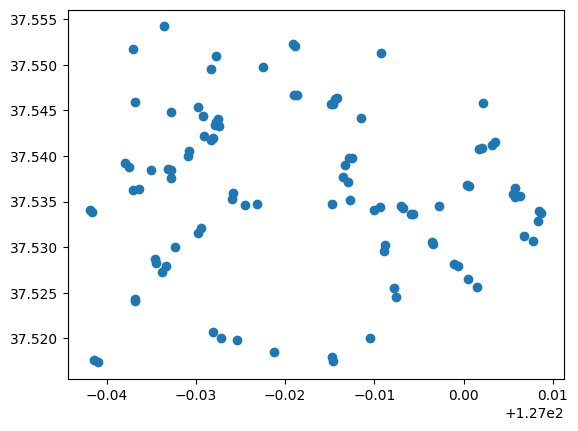

In [52]:
import matplotlib.pyplot as plt

plt.scatter(ys_df['X좌표'], ys_df['Y좌표'])
plt.show()

In [53]:
from sklearn.cluster import DBSCAN

# epsilon, 최소 샘플 개수 설정
dbscan = DBSCAN(eps=0.005, min_samples=2)
dbscan.fit(ys_df[['X좌표', 'Y좌표']])

DBSCAN(eps=0.005, min_samples=2)

In [54]:
labels = dbscan.labels_
num = len(set(labels))
print(labels)
print("군집 개수 =", len(set(labels)))

[ 0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  1  1  2  2  3  3
  3  3  3  3  3  3  3  4  3  3  3  3  3  3  3  3  3  3  3  3  1  1  1  1
  0  0  3  3  3  3  3  3  3  3  3  3  3  3  3  3  5  5  5  5  4  4  6  6
  1  1  1  1  0  0  0  3  3  3  3  3  3  3  3  3  3 -1  7  7  1  3  3  3
  1  1  3  3]
군집 개수 = 9


<ipython-input-55-9a7e83c6eda8>:5: UserWarning: The palette list has more values (30) than needed (9), which may not be intended.
  sns.scatterplot(x=ys_df['X좌표'], y=ys_df['Y좌표'], hue = labels, palette=palette)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51340 (\N{HANGUL SYLLABLE JWA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54364 (\N{HANGUL SYLLABLE PYO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


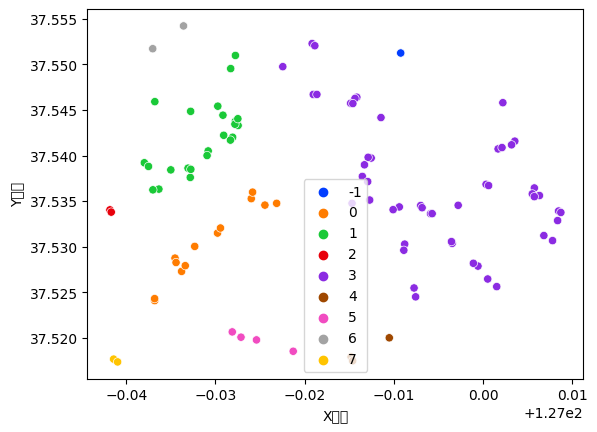

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

palette = sns.color_palette("bright", 30)
sns.scatterplot(x=ys_df['X좌표'], y=ys_df['Y좌표'], hue = labels, palette=palette)
plt.show()

In [56]:
def plot_dbscan(dbscan, X, size, color_num, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]

    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap=plt.cm.get_cmap('rainbow', color_num)) # 핵심
    plt.colorbar(ticks=range(color_num), format='color: %d', label='color')
    plt.scatter(cores[:, 0], cores[:, 1], s=20, marker='*', c=dbscan.labels_[core_mask]) # 마커 없애고 크기 수정
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100) # 이상치

    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".") # 잘 모르겠다 논코어가 다 -2인데 hmm..

    # plt.xlim([126.95, 127])
    if show_xlabels:
        plt.xlabel("Longitude", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)

    if show_ylabels:
        plt.ylabel("Latitude", fontsize=14, rotation=90)
    else:
        plt.tick_params(labelleft=False)
    plt.title("eps={:.3f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)

In [57]:
dbscan.eps

0.005

<ipython-input-56-4ba6b7f372f9>:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  c=dbscan.labels_[core_mask], marker='o', s=size, cmap=plt.cm.get_cmap('rainbow', color_num)) # 핵심


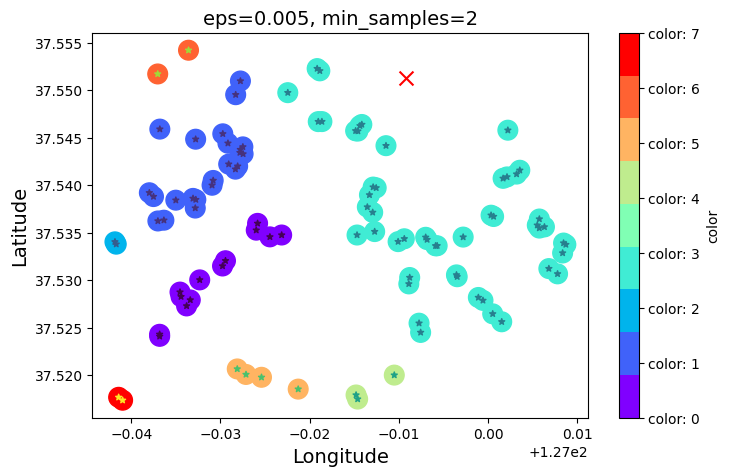

In [58]:
import numpy as np
a =  ys_df[['X좌표', 'Y좌표']]
a = a.values.tolist()
a = np.array(a)

plt.figure(figsize=(8, 5))
plot_dbscan(dbscan, a, size=200, color_num = num, show_ylabels=True)


plt.show()